## Tensorflow Examples
包含一些TensorFlow的操作示例： 

TensorFlow is: 
- An interface for **expressing** machine learning algorithms 
- an **implementation** for executing such algorithms
- A framework for creating ensemble algorithms for today's most challenging problems 

**运行环境**
- Python 3.5
- TensorFlow

**示例说明**
* 运算操作
* House price prediction

### 基本运算操作

In [10]:
# feed_dict操作
import tensorflow as tf

def run():
    output = None
    x = tf.placeholder(tf.int32)

    with tf.Session() as sess:
        # : Feed the x tensor 123
        output = sess.run(x, feed_dict={x : 123})

    return output
print(run())

# Add
result = tf.add(2, 3)
print(result)

tf.subtract(tf.cast(tf.constant(2.0), tf.int32),tf.constant(1))

x = tf.constant(10)
y = tf.constant(2)


with tf.Session() as tfss:
    result = tfss.run(tf.subtract(tf.divide(x, y), tf.cast(tf.constant(1),tf.float64)))
    print(result)

123
Tensor("Add_7:0", shape=(), dtype=int32)
4.0


### House price prediction示例

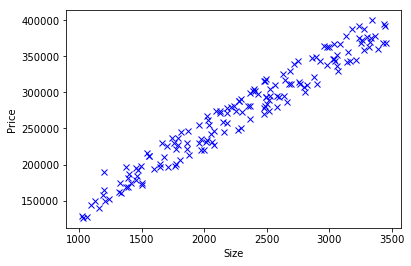

In [12]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# init data
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high =3500, size = num_house)

np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high = 70000, size = num_house)

# view data
plt.plot(house_size, house_price, "bx")
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

Iteration #: 0002 cost= 0.425049871 size_factor= 0.125234 price_offset= 0.282388
Iteration #: 0004 cost= 0.291372687 size_factor= 0.280437 price_offset= 0.231217
Iteration #: 0006 cost= 0.201830253 size_factor= 0.407475 price_offset= 0.18933
Iteration #: 0008 cost= 0.141854182 size_factor= 0.511459 price_offset= 0.155043
Iteration #: 0010 cost= 0.101684213 size_factor= 0.596573 price_offset= 0.126977
Iteration #: 0012 cost= 0.074781932 size_factor= 0.666241 price_offset= 0.104003
Iteration #: 0014 cost= 0.056766752 size_factor= 0.723266 price_offset= 0.0851978
Iteration #: 0016 cost= 0.044704199 size_factor= 0.769943 price_offset= 0.0698044
Iteration #: 0018 cost= 0.036628552 size_factor= 0.808149 price_offset= 0.0572039
Iteration #: 0020 cost= 0.031222925 size_factor= 0.839421 price_offset= 0.0468896
Iteration #: 0022 cost= 0.027605312 size_factor= 0.865019 price_offset= 0.0384468
Iteration #: 0024 cost= 0.025184909 size_factor= 0.885971 price_offset= 0.0315358
Iteration #: 0026 cost=

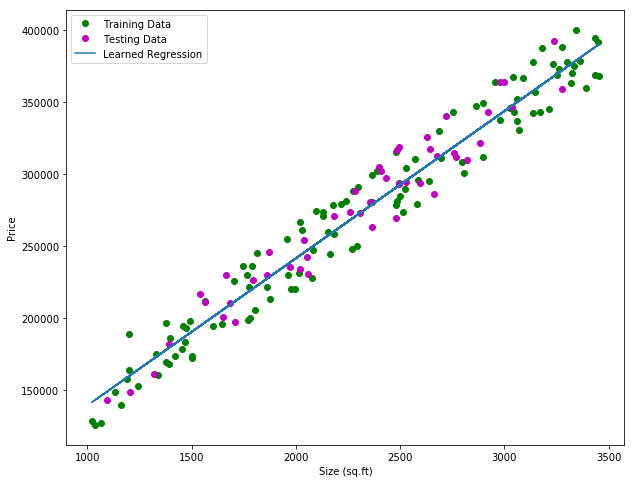

In [35]:
# 1. prepare data
def normalize(array):
    return (array - array.mean()) / array.std()

num_train_samples = math.floor(num_house * 0.7)

# training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# test data
test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

# setup tensorflow data
tf_house_size = tf.placeholder(tf.float32, name="house_size")
tf_price = tf.placeholder(tf.float32, name="price")

tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_factor = tf.Variable(np.random.randn(), name="price_offset")

# 2. Prediction function
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_factor)

# 3. Loss function 
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_price, 2))/(2 * num_train_samples)

# 4. optimizer
learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

# training
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    display_every = 2
    num_training_iter = 50
    
    for iteration in range(num_training_iter):
        # fit all training data
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict = {tf_house_size: x, tf_price: y})
        
        # display current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict ={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
            print("Iteration #:", '%04d' % (iteration +1), "cost=", "{:.9f}".format(c), \
                 "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_factor))
    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict ={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", \
          sess.run(tf_price_factor))
    
    # Plot result
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()
    train_price_mean = train_price.mean()
    train_price_std = train_price.std()

    plt.rcParams["figure.figsize"] = (10, 8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label ="Training Data")
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing Data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean, \
            (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_factor)) \
             * train_price_std + train_price_mean, label = "Learned Regression")
    plt.legend(loc='upper left')
    plt.show()

**Reference**
1, TensorFlow: Getting Started @pluralsight.com